In [146]:
import pandas as pd
import numpy as np

import time
import spacy
import re

import sys

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import itertools

from random import getrandbits
from random import seed

In [147]:
#import et merge des datasets
data_lyrics= pd.DataFrame()
for i in range(6):
    try:
        print(i)
        data_lyrics= pd.concat([data_lyrics, 
                                pd.read_csv("data/0{}_dataset_lyrics.csv".format(i+1))])
    except:
        #si mon fichier n'existe pas alors j'ajoute un df vide
        data_lyrics= pd.concat([data_lyrics, pd.DataFrame()])
        
data_lyrics= data_lyrics.rename({"test":"Lyrics"}, axis=1)

0
1
2
3
4
5


In [148]:
print(data_lyrics.shape)
# print(data_lyrics.head(1))
print(data_lyrics["Artiste"].unique())
print(data_lyrics["Style"].unique()) #erreur dnas l'écriture de la modalité
#Rock Alternatif
dico_map= {"Rock\\Alternatif":"Rock/Alternatif",
           "Rock/Alternatif":"Rock/Alternatif",
          "metal":"Metal",
          "pop":"Pop",
           "rap":"Rap",
          }
data_lyrics["Style"]= data_lyrics["Style"].map(dico_map)
data_lyrics["Style"].unique()

(1028, 6)
['Eminem' 'Falling In Reverse' 'Justin Bieber' 'Slipknot' 'Mac Miller'
 'DREAMERS' 'Bring Me The Horizon' 'Post Malone' 'Billie Eilish'
 'Motionless in White']
['rap' 'metal' 'pop' 'Rock/Alternatif' 'Rock\\Alternatif']


array(['Rap', 'Metal', 'Pop', 'Rock/Alternatif'], dtype=object)

In [149]:
data_lyrics= data_lyrics.drop("Url", axis= 1)
data_lyrics.columns

Index(['Artiste', 'Annee', 'Album', 'Style', 'Lyrics'], dtype='object')

In [150]:
data_lyrics.head()
#Necessité de traiter les lyrics ==> Quand on a un featuring, le chanteur qui chante 
#est reperé grace au i`AUTOR NAME`i

,Artiste,Annee,Album,Style,Lyrics
0,Eminem,2011,Straight From The Vault,Rap,Im a goat and for those of yall who dont know ...
1,Eminem,2009,Relapse,Rap,Ooww ladies and gentlemen The moment youve all...
2,Falling In Reverse,2015,Just Like You,Metal,This is where we begin Calling all cars its a...
3,Eminem,2002,The Eminem Show,Rap,These ideas are nightmares to white parents Wh...
4,Justin Bieber,2009,My World,Pop,Alright lets go Theres gonna be one less lone...


In [151]:
#on va creer un dico pour associer à chaque artiste son style
#le style reste constant dans le temps
dico_artiste_style= {artiste: data_lyrics[data_lyrics["Artiste"] == artiste]\
                     .iloc[0]["Style"]
                     for artiste in data_lyrics["Artiste"].unique()}
print(dico_artiste_style)

#on peut drop la colonne
data_lyrics= data_lyrics.drop("Style", axis= 1)
data_lyrics.reset_index(inplace= True, drop= True)
data_lyrics.columns

{'Eminem': 'Rap', 'Falling In Reverse': 'Metal', 'Justin Bieber': 'Pop', 'Slipknot': 'Metal', 'Mac Miller': 'Rap', 'DREAMERS': 'Rock/Alternatif', 'Bring Me The Horizon': 'Metal', 'Post Malone': 'Rap', 'Billie Eilish': 'Pop', 'Motionless in White': 'Rock/Alternatif'}


Index(['Artiste', 'Annee', 'Album', 'Lyrics'], dtype='object')

In [152]:
test_lyrics= data_lyrics["Lyrics"][9]
pattern_i= re.compile('i[\S]*i\s')
pattern_i.sub("",test_lyrics)
test_lyrics

'i2xi Can you tell from the look in our eyes were going nowhere We live our lives like were ready to die were going nowhere  I thought I buried you and covered the tracks Youll have to take this with your cold dead hands I thought I buried you Whats dead can never die  I thought Id cut you loose severed the feeling I slipped through the cracks and you caved in my ceiling I thought I buried you Whats dead can never die  Fuck  Can you tell from the look in our eyes were going nowhere We live our lives like were ready to die were going nowhere You can run but youll never escape over and over again Will we ever see the end were going nowhere  This is sempiternal Will we ever see the end This is sempiternal Over and over again and again  Rise from the dead you say Secrets dont sleep til theyre took to the grave Signal the sirens rally the troops Ladies and gentlemen Its the moment of truth  i2xi Can you tell from the look in our eyes were going nowhere We live our lives like were ready to d

In [153]:
#traitement des None
def verification(df):
    print("Vérifier si des valeurs sont None")
    for col in df.columns:
        nul= (df[col].isnull()).sum()
        sh= df.shape[0]
        print("\n")
        print(col)
        print(nul)
        print("Soit: {}% de valeurs None".format((nul/sh)*100))
    pass

verification(data_lyrics)
print(data_lyrics.shape)

#drop les lignes ou les lyrics manquent
data_lyrics= data_lyrics[data_lyrics["Lyrics"].notnull()]
verification(data_lyrics)
data_lyrics.shape

Vérifier si des valeurs sont None


Artiste
0
Soit: 0.0% de valeurs None


Annee
0
Soit: 0.0% de valeurs None


Album
0
Soit: 0.0% de valeurs None


Lyrics
8
Soit: 0.7782101167315175% de valeurs None
(1028, 4)
Vérifier si des valeurs sont None


Artiste
0
Soit: 0.0% de valeurs None


Annee
0
Soit: 0.0% de valeurs None


Album
0
Soit: 0.0% de valeurs None


Lyrics
0
Soit: 0.0% de valeurs None


(1020, 4)

## Evolution du nombre de mot unique par auteur

In [154]:
#nombre de musique pour chaque auteur et par année
data_lyrics[["Artiste", "Annee", "Lyrics"]].groupby(["Artiste", "Annee"]).agg(["count"])

Lyrics
                            count
Artiste              Annee       
Billie Eilish        2017       9
                     2019      16
Bring Me The Horizon 2004       9
                     2006       9
                     2008      10
                     2010      11
                     2013      14
                     2015      11
                     2019      20
DREAMERS             2014       4
                     2016      17
                     2018       9
                     2019      10
Eminem               1996      11
                     1998       7
                     1999      20
                     2000      18
                     2002      20
                     2003       7
                     2004      23
                     2005      19
                     2006       9
                     2009      29
                     2010      19
                     2011      11
                     2013      22
                     2014       7
                     2017      19
                     2018      13
Falling In Reverse   2011      11
...                           ...
Justin Bieber        2011      22
                     2012      20
                     2013      26
                     2015      21
Mac Miller           2009      36
                     2010      15
                     2011      50
                     2012      17
                     2013      29
                     2014      23
                     2015      17
                     2016      10
                     2018      13
Motionless in White  2007       6
                     2008      11
                     2010      13
                     2012      14
                     2014      14
                     2017      12
                     2019      11
Post Malone          2016      28
                     2018      18
                     2019      17
Slipknot             1996       9
                     1999      16
                     2001      14
                     2004      18
                     2008      15
                     2014      16
                     2019      14

[65 rows x 1 columns]

In [155]:
#multi index dataframe
data_multi= data_lyrics.set_index(["Artiste"])\
.sort_values(["Artiste"])

In [156]:
data_multi.head(10)

,Annee,Album,Lyrics
Artiste,,,
Billie Eilish,2019,"When We All Fall Asleep, Where Do We Go?",Billie What do you want from me Why dont you ...
Billie Eilish,2019,"When We All Fall Asleep, Where Do We Go?",White shirt now red my bloody nose Sleeping yo...
Billie Eilish,2017,Dont Smile At Me,Sitting all alone Mouth full of gum In the dri...
Billie Eilish,2017,Dont Smile At Me,Hey leave a message Hey call me back When you...
Billie Eilish,2017,Dont Smile At Me,Dont be cautious dont be kind You committed Im...
Billie Eilish,2019,"When We All Fall Asleep, Where Do We Go?",Bite my tongue bide my time Wearing a warning ...
Billie Eilish,2019,"When We All Fall Asleep, Where Do We Go?",Wait a minute let me finish I know you dont ca...
Billie Eilish,2019,"When We All Fall Asleep, Where Do We Go?",Please please Dont leave me be Its not true T...
Billie Eilish,2017,Dont Smile At Me,Ive been watching you for some time Cant stop ...


In [157]:
test= data_multi.groupby(["Artiste", "Annee"])["Lyrics"].agg(" ".join).to_frame()
test["compteur"]= test["Lyrics"].apply(lambda x: len(set(x.split(" "))))
test.reset_index(level=1, inplace=True)
test.head(10)

,Annee,Lyrics,compteur
Artiste,,,
Billie Eilish,2017,Sitting all alone Mouth full of gum In the dri...,513
Billie Eilish,2019,Billie What do you want from me Why dont you ...,831
Bring Me The Horizon,2004,Dead hands clutch my arm The smell of death fi...,453
Bring Me The Horizon,2006,Dead hands clutch my arm The smell of death fi...,532
Bring Me The Horizon,2008,Goodbye my friend goodbye my love youre in my ...,543
Bring Me The Horizon,2010,Started off as a one night stand lingered to a...,701
Bring Me The Horizon,2013,Middle fingers up if you dont give a fuck Im s...,752
Bring Me The Horizon,2015,Youre hypnotized cant see the signs Id like to...,614
Bring Me The Horizon,2019,Dont you try to fuck with me Dont you hide you...,1228


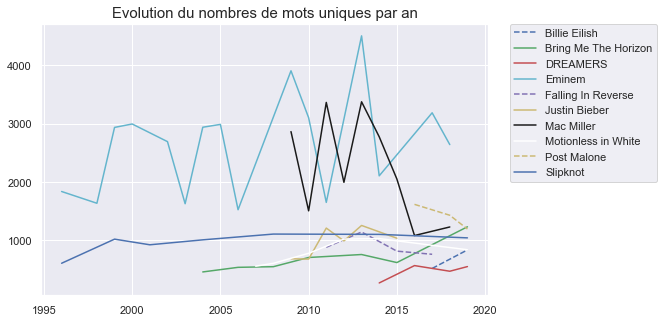

In [158]:
#evolution du nombres de mots uniques par artiste par an
def plot_per_artist_per_year(df, col):
    """
    Permet de plot l'évolution par artiste par an d'une métrique souhaité, comme le nombre de mots
    uniques ou bien le nombre de mot unique par musique en moyenne
    -df: le df doit être de type ==> index Artiste, 1 colonne Annee sort, et la colonne 
        de notre métrique
    -col: c'est le nom de la métrique que l'on retrouve dans df
    """
    seed(10)
    artiste_name= list(test.index.get_level_values('Artiste').unique())

    fig= plt.figure(figsize=(8,5))
    sns.set(style="darkgrid")
    cycled= itertools.cycle('bgrcmykwy')

    for art in artiste_name:
        year= list(df.query("Artiste == '{}'".format(art))["Annee"])
        data= list(df.query("Artiste == '{}'".format(art))[col])
    #     print(data)
    #     print(year)
        line=""
        if bool(getrandbits(1)):
            line="--"
        else:
            line="-"
        plt.plot(year, data, label= art, color= next(cycled), linestyle= line)
    #     ax= sns.lineplot(year, data, c=next(cycled), label= art)


    #pour faire sortir la legende du graphique
    plt.title("Evolution du nombres de mots uniques par an", fontsize= 15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    pass

plot_per_artist_per_year(test, "compteur")

### Remarque

Les rappeurs sont largement au dessus des autres artistes en terme de nombre de mots uniques par année

Peut-être existe t-il un lien entre nombre de musique et le nombre de mots uniques.

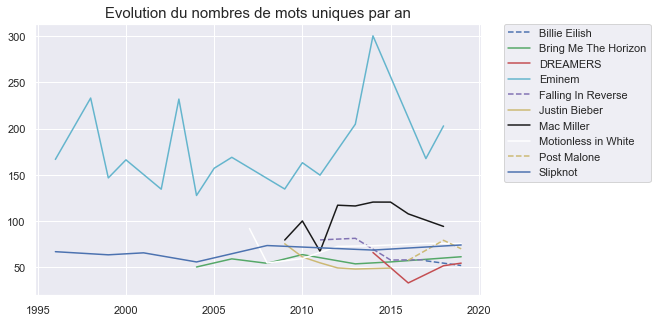

,Annee,Lyrics,compteur,Lyrics,mot_unique_per_song
Artiste,,,,,
Billie Eilish,2017,Sitting all alone Mouth full of gum In the dri...,513,9,57.000000
Billie Eilish,2019,Billie What do you want from me Why dont you ...,831,16,51.937500
Bring Me The Horizon,2004,Dead hands clutch my arm The smell of death fi...,453,9,50.333333
Bring Me The Horizon,2006,Dead hands clutch my arm The smell of death fi...,532,9,59.111111
Bring Me The Horizon,2008,Goodbye my friend goodbye my love youre in my ...,543,10,54.300000
Bring Me The Horizon,2010,Started off as a one night stand lingered to a...,701,11,63.727273
Bring Me The Horizon,2013,Middle fingers up if you dont give a fuck Im s...,752,14,53.714286
Bring Me The Horizon,2015,Youre hypnotized cant see the signs Id like to...,614,11,55.818182
Bring Me The Horizon,2019,Dont you try to fuck with me Dont you hide you...,1228,20,61.400000


In [159]:
nb_song_per_year= data_lyrics[["Artiste", "Annee", "Lyrics"]]\
                    .groupby(["Artiste", "Annee"])\
                    .count()

nb_song_per_year= nb_song_per_year.reset_index(level=1).sort_index().drop("Annee", axis= 1)
nb_song_per_year

per_song= pd.concat([test, nb_song_per_year], axis= 1)
per_song["mot_unique_per_song"]= per_song.apply(lambda row: row[2]/row[3], axis= 1)

plot_per_artist_per_year(per_song, "mot_unique_per_song")
per_song.head(10)

## Remarque


## Evolution du nombre de mot unique par style

In [160]:
#on va faire la même mais par style de musique
#on va laisser Artiste à la place de style pour faciliter le copier coller
data_lyrics_style= data_lyrics.copy()
data_lyrics_style["Artiste"]= data_lyrics["Artiste"].map(dico_artiste_style)
data_lyrics_style[["Artiste", "Annee", "Lyrics"]].groupby(["Artiste", "Annee"]).agg(["count"])

#multi index dataframe
data_multi_style= data_lyrics_style.set_index(["Artiste"])\
.sort_values(["Artiste"])

test= data_multi_style.groupby(["Artiste", "Annee"])["Lyrics"].agg(" ".join).to_frame()
test["compteur"]= test["Lyrics"].apply(lambda x: len(set(x.split(" "))))
test.reset_index(level=1, inplace=True)
test.head(10)

,Annee,Lyrics,compteur
Artiste,,,
Metal,1996,Cycle of life and death supposedly goes round...,602
Metal,1999,Pain Here comes the pain Enemy Show me what ...,1016
Metal,2001,You are wrong fucked and overrated I think Im ...,919
Metal,2004,This is the year where hope fails you The test...,1236
Metal,2006,Its 318 mouth tastes like the corpse of every ...,532
Metal,2008,We stare at broken clocks the hands dont turn ...,1365
Metal,2010,I was raised in the valley there was shadows a...,701
Metal,2011,I was born one morning in December On the cold...,876
Metal,2013,They drag me underground The lights are slowly...,1531


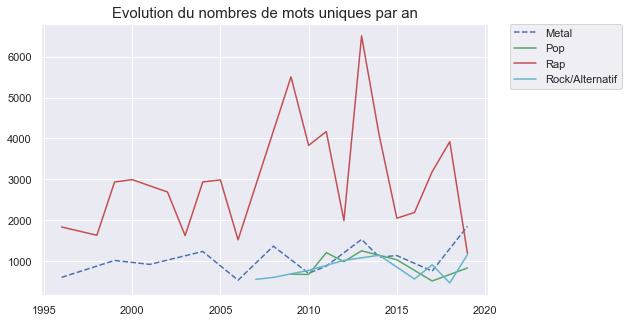

In [161]:
plot_per_artist_per_year(test, "compteur")

## Remarque

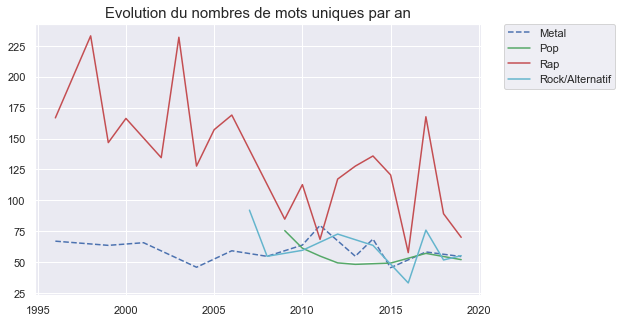

In [162]:
nb_song_per_year_style= data_lyrics_style[["Artiste", "Annee", "Lyrics"]]\
                    .groupby(["Artiste", "Annee"])\
                    .count()

nb_song_per_year_style= nb_song_per_year_style.reset_index(level=1)\
                    .sort_index().drop("Annee", axis= 1)
nb_song_per_year_style
per_song_style= pd.concat([test, nb_song_per_year_style], axis= 1)
per_song_style["mot_unique_per_song"]= per_song_style.apply(lambda row: row[2]/row[3], axis= 1)

plot_per_artist_per_year(per_song_style, "mot_unique_per_song")

## Remarque

## Cherchons à analyser quel style de musique est le plus vulgaire

On va donc utiliser [une liste de ban-word](https://www.freewebheaders.com/bad-words-list-and-page-moderation-words-list-for-facebook/) qui est utilisé pour la modération sur Facebook pour définir quel style est le plus vulgaire

In [163]:
nono_word= pd.read_csv("data/ban_word.csv", header= None, names= ["nono"])
nono_word= nono_word.drop(index= 0).reset_index(drop= True)
nono_word.head()

,nono
0,2girls 1 cup
1,2g1c
2,4r5e
3,5h1t
4,5hit


In [164]:
ban_word_list= nono_word["nono"].tolist()

In [165]:
data_lyrics_nono= data_lyrics.copy()
data_lyrics_nono["Artiste"]= data_lyrics["Artiste"].map(dico_artiste_style)
data_lyrics_nono[["Artiste", "Annee", "Lyrics"]].groupby(["Artiste", "Annee"]).agg(["count"])

#multi index dataframe
data_multi_nono= data_lyrics_nono.set_index(["Artiste"])\
.sort_values(["Artiste"])

test= data_multi_nono.groupby(["Artiste", "Annee"])["Lyrics"].agg(" ".join).to_frame()
test["compteur"]= test["Lyrics"].apply(lambda x: len(set(x.split(" "))))
test.reset_index(level=1, inplace=True)
test.head(10)

,Annee,Lyrics,compteur
Artiste,,,
Metal,1996,Cycle of life and death supposedly goes round...,602
Metal,1999,Pain Here comes the pain Enemy Show me what ...,1016
Metal,2001,You are wrong fucked and overrated I think Im ...,919
Metal,2004,This is the year where hope fails you The test...,1236
Metal,2006,Its 318 mouth tastes like the corpse of every ...,532
Metal,2008,We stare at broken clocks the hands dont turn ...,1365
Metal,2010,I was raised in the valley there was shadows a...,701
Metal,2011,I was born one morning in December On the cold...,876
Metal,2013,They drag me underground The lights are slowly...,1531


In [166]:
test["num_nono_word"]= test.apply(lambda x: len([word for word in x[1].split(" ")\
                                         if word in ban_word_list]), axis= 1)

In [167]:
test.head()

,Annee,Lyrics,compteur,num_nono_word
Artiste,,,,
Metal,1996,Cycle of life and death supposedly goes round...,602,24
Metal,1999,Pain Here comes the pain Enemy Show me what ...,1016,116
Metal,2001,You are wrong fucked and overrated I think Im ...,919,76
Metal,2004,This is the year where hope fails you The test...,1236,43
Metal,2006,Its 318 mouth tastes like the corpse of every ...,532,37
